## TensorFlow Input Pipeline
**Problem**
- Lets say you are building an image classification model.
- You have 1000 images stored in hard disk.
- Then you load thaese images in RAM as some kind of numpy array or dataframe to use.
- But what if you have 10 million images and 8gb RAM then you can't do it.
**Solution**
- To overcome this problem you can load the data in batches, this is called as training approch.
- Each batch is 1000 images, you load this batch in some **special datastructure**
- Then you train model for this batch then next batch..
- That Special Datastructure is **tf.data.Dataset** -> this is what help you build tensorflow input pipeline.
- tf.data is AIP framework and tf.data.Dataset is main class in this framework.
- Now suppose you have some blurry image in dataset, which means you cant directly load and use data. You have to perform data cleaning, processing, transformation, scaling etc.
- tf_dataset as lots of good APIs to support data transformation like .filter, .map etc 
- The major advantage is that you can write all these transformation in single line of code

    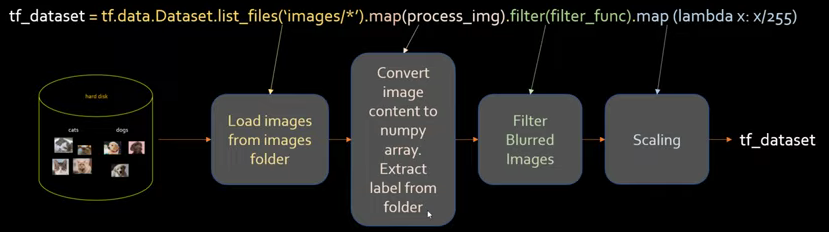
    
- tf_dataset internally use numpy array to load images and convert to tensors which is underliying datastructure in tf_dataset.  

In [16]:
import tensorflow as tf

In [17]:
daily_sales_numbers=[21, 22, -100, 31, -1, 34, 31]

# tf_dataset from python list
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [18]:
for sales in tf_dataset:
    print(sales) # each value is a tensor

for sales in tf_dataset:
    print(sales.numpy()) # tensor converted to numpy object

tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(-100, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
tf.Tensor(-1, shape=(), dtype=int32)
tf.Tensor(34, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
21
22
-100
31
-1
34
31


In [19]:
for sales in tf_dataset.take(3): # takes first 3 tensors
    print(sales)

tf.Tensor(21, shape=(), dtype=int32)
tf.Tensor(22, shape=(), dtype=int32)
tf.Tensor(-100, shape=(), dtype=int32)


In [20]:
# filter function
# you can define lambda function for the filter
tf_dataset = tf_dataset.filter(lambda x: x>0) # this lambda function will remove value less than 0
for sales in tf_dataset.as_numpy_iterator(): # as_numpy_iterator() -> this also conpert tensor to numpy array
    print(sales)

21
22
31
34
31


In [21]:
# map function -> take the function and apply to all the dataset value
tf_dataset = tf_dataset.map(lambda x: x*72) # lambda -> multiply every valuee with 72
for sales in tf_dataset:
    print(sales)

tf.Tensor(1512, shape=(), dtype=int32)
tf.Tensor(1584, shape=(), dtype=int32)
tf.Tensor(2232, shape=(), dtype=int32)
tf.Tensor(2448, shape=(), dtype=int32)
tf.Tensor(2232, shape=(), dtype=int32)


In [22]:
# shuffle function -> shuffle data randomly
# expects a parameter  called buffer
tf_dataset = tf_dataset.shuffle(2) # buffer=2 here
for sales in tf_dataset.as_numpy_iterator(): 
    print(sales)

# about buffer argument - https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset

1584
1512
2448
2232
2232


In [23]:
# Batching 
for sales_batch in tf_dataset.batch(2):
    print(sales_batch.numpy())

[1512 1584]
[2232 2448]
[2232]


In [25]:
# PERFORM EVERYTHING IN SINGLE LINE
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)

tf_dataset = tf_dataset.filter(lambda x: x>0).map(lambda y: y*72).shuffle(2).batch(2)

for sales in tf_dataset.as_numpy_iterator():
    print(sales)
    
# this is the power of using tf_dataset

[1512 2232]
[1584 2448]
[2232]


In [ ]:
# you can download some cat and dog images and store in a folder images with dog folder and cat folder
# images
#   |_dog
#       |_dog1.jpg
#       |_dog2_jpg
#   |_cat
#       |_cat1.jpg
#       |_cat2_jpg

images_ds = tf.data.Dataset.list_files("images/*/*", shuffle=True) 
for file in images_ds.take(3):
    print(file.numpy()) # prints the path of the images

In [ ]:
class_names = ["cat", "dog"]

In [ ]:
image_count = len(images_ds)
image_count

In [ ]:
# Train Test Split 
train_size = int(image_count*0.8)

train_ds = images_ds.take(train_size) # take first 80% samples
test_ds = images_ds.skip(train_size) # skip first 80% samples and take rest

In [ ]:
for t in train_ds.take(3):
    print(t.numpy())

In [ ]:
# extract dog or cat label fom image link for y_train and y_test

def get_label(file_path):
    import os
    return tf.strings.split(file_path, os.path.sep)[-2]

for label in train_ds.map(get_label):
    print(label)

In [ ]:
# now X_tain and X_test we need images arrays not the path of images

def process_image(file_path):
    label = get_label(file_path)

    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])

    return img, label


In [ ]:
train_ds = train_ds.map(process_image)
for img, label in train_ds.take(3):
    print("IMAGE: ", img)
    print("LABEL: ", label)

In [ ]:
def scale(image,label):
    return image/255, label

In [ ]:
train_ds = train_ds.map(scale)
for image, label in train_ds.take(3):
    print("IMAGE: ", image.numpy()[0][0]) # not printing the whole image
    print("LABEL: ", label.numpy())